# 1. Preliminares

## 1.1 Descripción del problema

Se nos presenta una base de datos con 30.000 tweets y el sentimiento asociado a cada uno de estos. La base contiene 2 columnas, "content" y "sentiment", la primera corresponde al tweet, y la segunda al sentimiento asociado a este. Cabe destacar que existen 13 tipos de sentimientos difrentes, los cuales se deben clasificar en 2 tipos, positivos y negativos. Con esta información debemos generar 5 modelos de clasificación que nos permitan al momento de entregar o ingresar un nuevo tweet predecir si este está asociado a un sentimiento positivo o negativo. Una vez listos los modelos se debe evaluar cual o de estos nos entregan el mejor resultado, considerando para ello los resultados obtenidos mediante las metricas de evaluación de problemas de clasifición, tales como Recall Precision, F1 y área bajo la curva ROC.

## 1.2 Objetivos

* Crear un modelo predictivo de clasificación que nos permita predecir con la mayor exactitud posible si un tweet está asociado a un sentimiento positivo o negativo.

## 1.3 Implementación

* 1 - Leemos mediante pd.read la base "training_tweets"
* 2 - Eliminamos la columna "Unnamed: 0"
* 3 - Realizamos un análisis exploratorio del vector objetivo "sentiment".
* 4 - Recodificamos el vector objetivo "sentiment", agrupando los 13 difrentes tipos de sentimientos existentes entre prositivos y negativos según lo indicado, considerando para esto la distribución del sentimiento "neutral" de forma aleatorea entre positivo y negativo.
* 5- Una vez recodificado el vector objetivo "sentiment", lo binarizamos mediante la clase LabelEncoder.
* 6 - Generaremos una función llamada "txt_preprocessor", la cual realizará una limpieza del texto entregado, cambiando todas las letras a minúscula y eliminando todos aquellos caracteres que no sean letras, esta queda alojada en archivo auxiliar funciones.py
* 7 - Tokenizamos los tweets para realizar el proceso de normalización de texto mediante lematización.
* 8 - Vectorizaremos cada tweet mediante CountVectorizer, definiremos aquellas palabras que no se consideraran mediante stopwords y proprocesamos el texto con la función "txt_preprocessor".
* 9 - Realizamos el fit_transform a la columna "content".
* 10 - Generamos un DataFrame llamado df_tweets, que contiene los vectores de las palabras con sus respectivos nombres.
* 11 - Realizamos la división de muestras de entrenamiento y validación, en donde nuestro vector objetivo (y) correspondera a la columna binarizada "sentiment", y los atributos (X) a todas los columnas de df_tweets.
* 12 - Implementaremos 5 modelos de clasificación a los cuales se le realizará una busqueda de grilla para encontrar los mejores hiperparametros para cada uno de ellos.
* 13 - Una vez implementados los 5 modelos, obtendremos las métricas de desempeño para cada uno de ellos (Recall Precision, F1 y área bajo la curva ROC), en base a estos resultados, escogeremos los 2 modelos que presenten el mejor (desepeño).
* 14 - Serializamos los 2 modelos escogidos bajo la siguiente nomenclatura nombre_grupomodelo-1 y nombre_grupo-modelo-2 y los enviamos a evaluación.

## 1.4 Criterios de optimización y métricas de desempeño

Para evaluar los modelos de clasificación se utilizarán principalmente las siguientes métricas:
* __Precision__: exactitud del modelo para predecir una clase, en porcentaje.
* __Recall__: capacidad del modelo de recordar las etiquetas reales, en porcentaje.
* __F1__: promedio entre precision y recall, que penaliza diferencias entre las métricas
* __ROC_AUC__ (valor del área bajo la curva ROC): métrica que captura las distintas combinaciones de TPR Y FPR posibles de alcznar, resumiendo en un valor que va de 0 a 1 la capacidad del modelo en predecir las etiquetas correctamente. 

# 2. Aspectos Computacionales

In [1]:
# Numpy: librería escencial para procesos matemáticos utilizados en data science
import numpy as np
# Pandas: librería para la creación y manipulación de estructura de datos
import pandas as pd
# Matplotlib: librería basada en Matlab, utilizada para realizar gráficos en 2D
import matplotlib.pyplot as plt
# Seaborn: librería avanzada para gráficos
import seaborn as sns
# Función para visualizar de forma gráfica los valores perdidos
from missingno import matrix
# Importación de funciones creadas 
import funciones as fn

# Importación de función para respuesta aleatoria
from random import choice
# Librería para funciones con expresiones regulares
import re
# Librería con funciones asociadas al tipo de dato 'string'
import string
# Librería para serialzación
import pickle
# Importación de Pipeline y transdormadores para el preproceso
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA

# Clase para instanciar modelos de Keras como objetos de scikit-learn
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# Regularizador para neuronas
from tensorflow.keras.regularizers import l2
# Arquitectura secuencial para modelos de redes neuronales
from tensorflow.keras.models import Sequential
# Clase para conexciónes densamente pobladas
from tensorflow.keras.layers import Dense

# Clase para instanciar vectorizador CountVectorizer y TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Clase para realizar una codificación de variable categórica
from sklearn.preprocessing import LabelEncoder

# Clase para instanciar modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
# Clase para instanciar modelo de Gradient Boosting
from xgboost import XGBClassifier
# Clase para instanciar modelo de Regresión lógistica
from sklearn.linear_model import LogisticRegression
# Clase para instanciar modelo de support vector machine
from sklearn.svm import SVC
# Importación de métricas para problemas de clasificación
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
# Clase para instanciar modelo de Naive Bayes para problemas de clasificación binarios
from sklearn.naive_bayes import BernoulliNB
# Función para estratificación de la muestra
from sklearn.model_selection import StratifiedKFold
# Clase para realizar busqueda de grilla con validación cruzada
from sklearn.model_selection import GridSearchCV
# Objeto para instanciar  Regresión Logística
from sklearn.linear_model import LogisticRegression


# Importación de librerías y funciones para natural lenguage processing
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/fernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/fernando/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# Estilo gráficos
plt.style.use('ggplot')

Para que haya consitencia entre las muestras de entrenamiento y de prueba, se opta por unir las bases con el fin de que se realice el preprocesamiento en forma conjunta y, posteriormente, realizar la separación a través de la variable auxiliar `sample`.

In [3]:
# Importación de la base
train = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
test = pd.read_csv('text_emotion.csv').drop(columns=['tweet_id', 'author'])
# Variable auxiliar 
train['sample'] = 'train'
test['sample'] = 'test'
# Unión de las muestras
df = pd.concat([train, test], sort=True, ignore_index=True)
print('Las dimensiones de la base son: {} filas y {} columnas'.format(df.shape[0], df.shape[1]))

Las dimensiones de la base son: 70000 filas y 3 columnas


# 3. Análisis Exploratorio ex-ante Preproceso

In [4]:
# Exploración de features y el tipo de datos correspondientes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
content      70000 non-null object
sample       70000 non-null object
sentiment    70000 non-null object
dtypes: object(3)
memory usage: 1.6+ MB


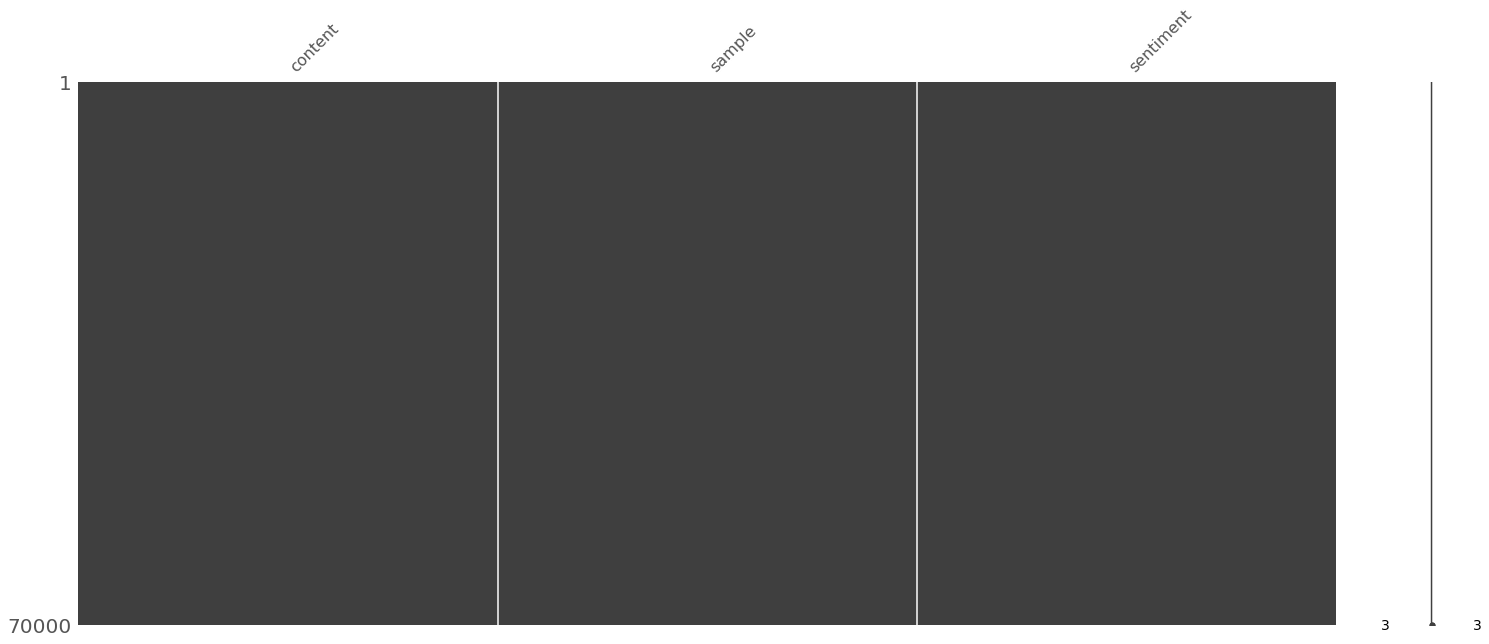

In [5]:
# Visión general de datos perdidos
matrix(df)

__Comentario__: Se puede observar del siguiente gráfico que no existen datos con valores perdidos.

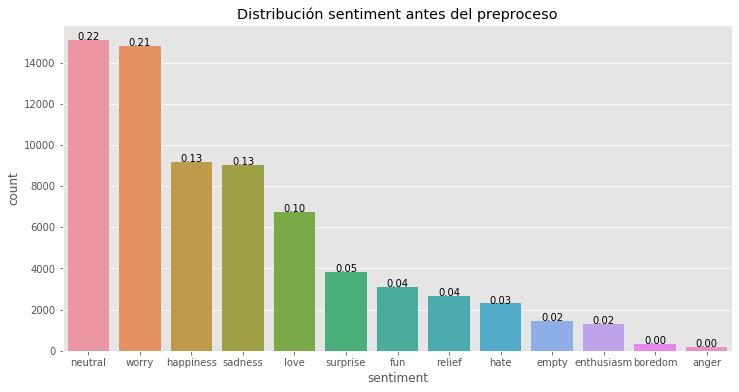

In [6]:
# Distribución de 1º Target
plt.figure(figsize=(12,6))
ax = sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['sentiment'])), ha="center")
plt.title('Distribución sentiment antes del preproceso')
plt.show()

__Comentario:__ Se observa una distribución de "sentimeintos" variada y en tanto frecuencias relativas como de clases en los tweets de la base. Cabe destacar la importante proporción (22%) de casos clasificados como neutrales y worry con un 21%. Seguidos estan los sentimientos relacionados a 'happiness' y 'sadness' con un 13% y 'love' que ocupa un 10%, entre un 5% y un 2% tenemos los restantes tipos de sentimientos como 'enthusiasm', 'empty', 'hate', 'relief', 'fun' y 'surprise'. Finalmente los que tenemos en menor cantidad son 'boredom' y 'anger' con menos del 1% de los registros.

# 4. Feature engineering

Las sentimientos descritos anteriormente son clasificados entre ```positive``` y ```negative```, según el diccionario ```emotions```. Dentro de los análisis intermedios, se comprobaron mejores resultados al eliminar las observaciones relacionadas al sentimiento ```neutral```, en vez de clasificar aleatoramiente entre las 2 clasificaciones descritas anteriormente.

In [7]:
# Recodificación de sentimientos entre positivos y negativos
emotions = {'worry': 'negative', 'happiness': 'positive', 'sadness': 'negative',
              'love': 'positive', 'surprise': 'positive', 'fun': 'positive',
              'relief': 'positive', 'hate': 'negative', 'empty': 'negative', 
              'enthusiasm': 'positive', 'boredom': 'negative', 'anger': 'negative'}
         

df['sentiment'] = df['sentiment'].replace(emotions)
# Borrar las filas con sentimiento 'neutral'
df = df[df['sentiment'] != 'neutral'].reset_index()
# Aplicamos label encoder
lbl_encoder = LabelEncoder()

# Codificación
df['sentiment'] = lbl_encoder.fit_transform(df['sentiment'])
print('0: {} y 1: {}'.format(lbl_encoder.classes_[0], lbl_encoder.classes_[1]))

0: negative y 1: positive


A continuación, se procede con el preprocesamiento de los _tweets_ a través del objecto `CountVectorizer`. Este objeto incialmente toma los _tweets_ de la base, y los preprocesa con la función auxiliar `text_preprocessor` que realiza la tokenización, limpieza y lemmatización de las palabras encontradas en cada observación, para finalmente vectorizar por cada palabra la base completa.

In [8]:
# Definición de Stop Words
custom_stop_words = ['http', 'day']
modified_stop_words = stopwords.words('english') + custom_stop_words

In [9]:
# Vectorizción 
count_vectorizer = CountVectorizer(stop_words=modified_stop_words, 
                                   preprocessor=fn.text_preprocessor, min_df=4)
disp_matrix = count_vectorizer.fit_transform(df['content'])

print('Matriz dispersa de {} filas y {} columnas'.format(disp_matrix.shape[0], disp_matrix.shape[1]))

/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Matriz dispersa de 54911 filas y 9111 columnas


In [10]:
# Separación de muestras entre muestra de entrenamiento y validación
df_tweets = pd.DataFrame(disp_matrix.toarray(), columns=count_vectorizer.get_feature_names())

X = df_tweets
y = df['sentiment']
train_index = df[df['sample'] == 'train'].index
test_index = df[df['sample'] == 'test'].index

X_train = df_tweets.loc[train_index, :]
X_test = df_tweets.loc[test_index, :]
y_train = df['sentiment'][train_index]
y_test = df['sentiment'][test_index]

# 5. Análisis Exploratorio ex-post Preproceso

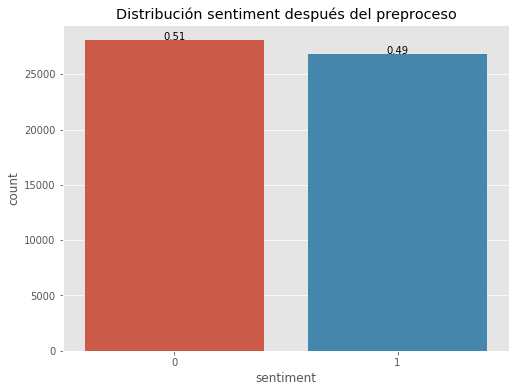

In [11]:
# Distribución de 1º Target
plt.figure(figsize=(8,6))
ax = sns.countplot(x='sentiment', data=df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + .5,
        '{:1.2f}'.format(height/len(df['sentiment'])), ha="center")
plt.title('Distribución sentiment después del preproceso')
plt.show()

__Comentario:__ Se observa una distribución bastante balanceada entre los tweets asociados a emociones negativas (0) y positivas (1), sienda esta la clase con mayoría con un 51% de la muestra.

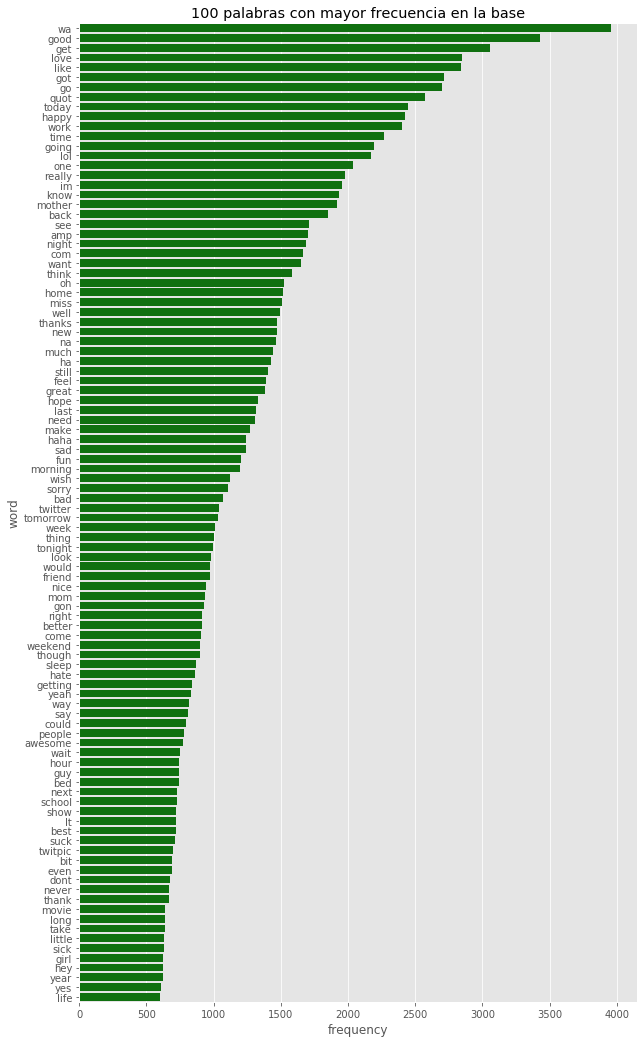

In [12]:
# Generar variables con las palabras y sus cantidades
words = count_vectorizer.get_feature_names()
count_words = disp_matrix.toarray().sum(axis=0)

# Creación de DataFrame y posterior orden
df_words = pd.DataFrame({'word': words, 'frequency': count_words}).sort_values('frequency', ascending=False)[:100]

# Gráfico de las 100 palabras más repetidas
plt.figure(figsize=(10,18))
sns.barplot(x='frequency', y='word', data=df_words, color='green')
plt.title('100 palabras con mayor frecuencia en la base')
plt.show()

In [13]:
# 50 palabras principales por sentimiento
fn.get_words(df, 'sentiment', 'content', n_words=50, vectorizer=count_vectorizer)


1
 ['love', 'good', 'happy', 'wa', 'mother', 'quot', 'lol', 'like', 'got', 'get', 'thanks', 'time', 'today', 'go', 'great', 'com', 'going', 'see', 'one', 'night', 'haha', 'amp', 'new', 'really', 'fun', 'back', 'know', 'work', 'well', 'im', 'morning', 'oh', 'much', 'hope', 'home', 'mom', 'nice', 'think', 'ha', 'want', 'awesome', 'na', 'last', 'make', 'twitter', 'thank', 'look', 'still', 'best', 'week']

0
 ['wa', 'get', 'go', 'work', 'like', 'got', 'today', 'going', 'im', 'good', 'sad', 'miss', 'really', 'time', 'know', 'one', 'quot', 'feel', 'want', 'back', 'sorry', 'think', 'still', 'need', 'bad', 'na', 'home', 'oh', 'amp', 'hate', 'lol', 'ha', 'night', 'see', 'much', 'well', 'last', 'make', 'wish', 'com', 'suck', 'hope', 'new', 'thing', 'sleep', 'love', 'sick', 'tomorrow', 'gon', 'week']


__Comentario:__ Se observan de ambos gráficos la variedad de palabras con mayor frecuencia: en el primer gráfico de manera transversal a toda la base y en el segundo las 50 más repetidas en cada sentimiento. Se observa que a priori hay holgura en mejorar el preproceso y vectorización, habiendo palabras que se repiten en ambas clases (por lo tanto poco informativas) y otras palabras que por su naturaleza es inferible su poca relación con el fenómeno que hay detrás de generar el sentimiento asociado. Este proceso de 'tunning' del preproceso y vectorización se continuará e iterará en las próximas entregas.

# 6 Modelamiento

__Importante__: Al haber más de 9.000 features, los tiempos de entrenamiento del modelo (sobre 800 segundos en una prueba) y los resultados preliminares no justificaron seguir de esta forma el _training_ en los modelos de XGBoost, RandomForest y Support Vector Mahcine. Por lo que se optó realizar un redimiencionamiento de los datos a través de __PCA__, con un número predefinido de 100 componentes.
Además, en honor a reducir los tiempos de carga del notebook, se dejó comentado la grilla de hiperparámetros y la instancia del `GridSearchCV` de los 5 modelos, dejandose solo el entrenamiento y métricas del modelo con mejor combinación de hiperparámetros

In [14]:
# Estratificación para GridSearchCV
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# 6.1 XGBoost

pipe_xgb = Pipeline(steps=[('pca', PCA()), ('xgb', XGBClassifier(n_jobs=-1))])
model_params = {'pca__n_components':[50, 100], 'xgb__max_depth': [3, 5, 7]}
grid = GridSearchCV(pipe_xgb, model_params, n_jobs=-2)
fn.clf_metrics(grid, X_train, y_train, X_test, y_test)

In [15]:
xgb_pipe_best = Pipeline(steps=[('pca', PCA(100)), 
                                ('xgb', XGBClassifier(n_jobs=-1, max_depth=5))])
fn.clf_metrics(xgb_pipe_best, X_train, y_train, X_test, y_test)

ROC_Score:
0.742
Confusion_Matrix:
[[12814  3249]
 [ 4808 10491]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     16063
           1       0.76      0.69      0.72     15299

    accuracy                           0.74     31362
   macro avg       0.75      0.74      0.74     31362
weighted avg       0.74      0.74      0.74     31362

Realizado en 34.838s


## 6.2 Support Vector Machine

# Support Vector Machine
svm = SVC(random_state=123)
param_grid_svm = {'kernel': ['rbf', 'linear'],
             'C': [.5, .7, 1], 
              'gamma': ['scale', 'auto']}
grid_svm = GridSearchCV(svm, param_grid_svm, n_jobs=-1, cv=2)
fn.clf_metrics(grid_svm, X_train, y_train, X_test, y_test)

In [16]:
svm_pipe_best = Pipeline(steps=[('pca', PCA(100)),
                                ('svm', SVC(random_state=123, 
                                            C=1, kernel='rbf', 
                                            gamma='scale'))])
fn.clf_metrics(svm_pipe_best, X_train, y_train, X_test, y_test)

ROC_Score:
0.743
Confusion_Matrix:
[[13616  2447]
 [ 5527  9772]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77     16063
           1       0.80      0.64      0.71     15299

    accuracy                           0.75     31362
   macro avg       0.76      0.74      0.74     31362
weighted avg       0.75      0.75      0.74     31362

Realizado en 202.432s


## 6.3 Logistic Regression

# Logistic Regression
log = LogisticRegression(random_state=123)
param_grid_log = {'C': [.5, .7, 1, 1.5, 2],
                  'penalty': ['l2', 'l1', 'elasticnet']}
grid_log = GridSearchCV(log, param_grid_log, n_jobs=-1, cv=2)
fn.clf_metrics(grid_log, X_train, y_train, X_test, y_test)

In [17]:
log_pipe_best = Pipeline(steps=[('pca', PCA(100)),
                                ('log', LogisticRegression(random_state=123,
                                                          C=1, penalty='l2'))])
fn.clf_metrics(log_pipe_best, X_train, y_train, X_test, y_test)

ROC_Score:
0.686
Confusion_Matrix:
[[12722  3341]
 [ 6434  8865]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.66      0.79      0.72     16063
           1       0.73      0.58      0.64     15299

    accuracy                           0.69     31362
   macro avg       0.70      0.69      0.68     31362
weighted avg       0.69      0.69      0.68     31362

Realizado en 21.065s


## 6.4 Naive Bayes

naive_bayes = BernoulliNB()
param_grid_nb = {'alpha': [.2,.4,.6, 1], 'fit_prior':[True, False]}
grid_nb = GridSearchCV(naive_bayes, param_grid_nb, cv=strat)
fn.clf_metrics(grid_nb, X_train, y_train, X_test, y_test)

In [18]:
nb_best = BernoulliNB(alpha=1, fit_prior=True)
fn.clf_metrics(nb_best, X_train, y_train, X_test, y_test)

ROC_Score:
0.789
Confusion_Matrix:
[[13098  2965]
 [ 3621 11678]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     16063
           1       0.80      0.76      0.78     15299

    accuracy                           0.79     31362
   macro avg       0.79      0.79      0.79     31362
weighted avg       0.79      0.79      0.79     31362

Realizado en 16.448s


## 6.5 Red Neuronal

En los análisis preliminares, se probó un conjunto de arquitecturas secuenciales distintas. Entre los modelos utilizdos, se probaron: 1 capa oculta, 3 capas ocultas, número de neuronas de la primera capa y segunda capa valores oscilantes entre 5 y 100, y valores entre .01 y .00001 de penalización. Por resultados en la muestra de validación y parsimonia, finalmente se escoge quedarse con la siguiente arquitectura:

In [19]:
# Norma de regularización con lambda=0.01
ridge_regularizer = l2(0.0005)


# Instanciamos la Red Neuronal
input_dim = (X_train.shape[1],)
model = Sequential()
model.add(Dense(20, activation='relu',
                kernel_regularizer = ridge_regularizer,
                use_bias=True, 
                input_shape=input_dim,
                name='Primera_capa'))

model.add(Dense(12, activation='relu', 
                kernel_regularizer = ridge_regularizer,
                use_bias=True, 
                name='Segunda_capa'))

model.add(Dense(1, activation='sigmoid', use_bias=True, name='output'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Primera_capa (Dense)         (None, 20)                182240    
_________________________________________________________________
Segunda_capa (Dense)         (None, 12)                252       
_________________________________________________________________
output (Dense)               (None, 1)                 13        
Total params: 182,505
Trainable params: 182,505
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Fit del modelo
model.fit(x=X_train, y=y_train, batch_size=512, epochs=60, validation_data=(X_test, y_test))

Train on 23549 samples, validate on 31362 samples
Epoch 1/60
23549/23549 [==============================] - 7s 287us/sample - loss: 0.6730 - accuracy: 0.6911 - val_loss: 0.6248 - val_accuracy: 0.7539
Epoch 2/60
23549/23549 [==============================] - 6s 272us/sample - loss: 0.5948 - accuracy: 0.7520 - val_loss: 0.5579 - val_accuracy: 0.7638
Epoch 3/60
23549/23549 [==============================] - 4s 149us/sample - loss: 0.5410 - accuracy: 0.7673 - val_loss: 0.5216 - val_accuracy: 0.7760
Epoch 4/60
23549/23549 [==============================] - 4s 172us/sample - loss: 0.5133 - accuracy: 0.7782 - val_loss: 0.5059 - val_accuracy: 0.7831
Epoch 5/60
23549/23549 [==============================] - 5s 219us/sample - loss: 0.4992 - accuracy: 0.7870 - val_loss: 0.4977 - val_accuracy: 0.7884
Epoch 6/60
23549/23549 [==============================] - 4s 165us/sample - loss: 0.4895 - accuracy: 0.7933 - val_loss: 0.4918 - val_accuracy: 0.7925
Epoch 7/60
23549/23549 [==========================

In [21]:
# Predecir la muestra de validación
y_hat = model.predict(X_test)
y_hat = [1 if i >= .5 else 0 for i in y_hat]
# Métricas
metrics = {'ROC_Score': roc_auc_score(y_test, y_hat).round(3),
           'Confusion_Matrix': confusion_matrix(y_test, y_hat).round(3),
           'Classification_Report': classification_report(y_test, y_hat)}
for key, value in metrics.items():
    print('{}:\n{}'.format(key, value))

ROC_Score:
0.906
Confusion_Matrix:
[[14643  1420]
 [ 1530 13769]]
Classification_Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     16063
           1       0.91      0.90      0.90     15299

    accuracy                           0.91     31362
   macro avg       0.91      0.91      0.91     31362
weighted avg       0.91      0.91      0.91     31362



## 6.6 Comparación métricas modelos

Al comparar resultados en las métricas, se observa que el modelo de red neuronal secuencial supera en todas las métricas para ambas clases. La SNN obtiene un sólido .91 de f1 ponderado, siendo muy balanceado su desempeño por clase, con .91 para la clase 0 y .90 para la clase 1. En términos de f1 ponderado, le sigue en desempeño más abajo Naive Bayes, con un .79, obteniendose de igualmente resultados balanceados en f1 por clase: .80 para la clase 0 y .72 para la clase 1. Estos dos modelos serán los enviados a evaluación.

Más abajo se posicionan XGBoost, SVM, LogisticRegression, con f1 ponderado de .74, .74, .68, respectivamente 

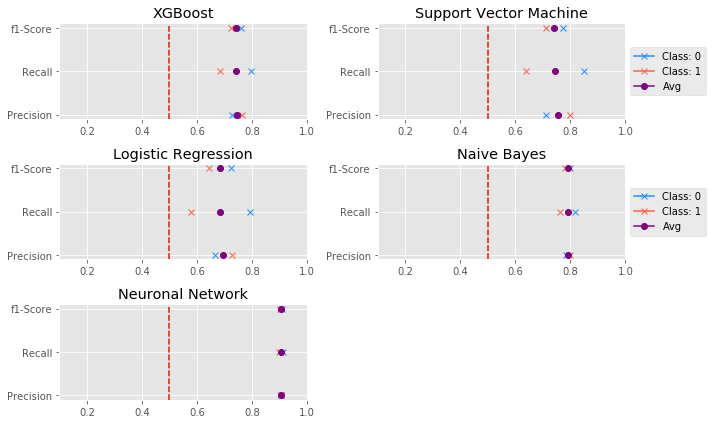

In [23]:
estimators = [('XGBoost', xgb_pipe_best), 
              ('Support Vector Machine', svm_pipe_best),
              ('Logistic Regression', log_pipe_best),
              ('Naive Bayes', nb_best),
              ('Neuronal Network', model)]

fn.compare_classifiers(estimators, X_test.values, y_test, n_cols=2)

# 7. Serialización

Para la serialización de un modelo implementado en Keras se necesitan desarrollar pasos adicionales. Primero, se debe de convertir la arquitecura de la red neuronal deseada a una función, la cual será utilizada por el objeto `KerasClassifier`. 
Cabe mencionar que al no poder variar la cantidad de neuronas de entrada igual al número de columnas del dataframe o array de entrenamiento, se fijó en 9111, que es la dimensiones de las columnas después de procesar la base completa con 'CountVectorizer', a utilizarse durante el entrenamiento de los modelos a enviar.

In [34]:
# Función para crear modelos de Keras, requerido para KerasClassifier
def keras_model():
    
    ridge_regularizer = l2(0.0005)
    model = Sequential()
    
    model.add(Dense(20, activation='relu',
                kernel_regularizer = ridge_regularizer,
                use_bias=True, 
                input_shape=(9111, ),
                name='Primera_capa'))

    model.add(Dense(12, activation='relu', 
                kernel_regularizer = ridge_regularizer,
                use_bias=True, 
                name='Segunda_capa'))

    model.add(Dense(1, activation='sigmoid', use_bias=True, name='output'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [35]:
# Pipeline red neuronal
nn_pipe = Pipeline(steps=[
                        ('vectorizer', 
                             CountVectorizer(
                                stop_words=stopwords.words('english') + ['http', 'day'], 
                                preprocessor=fn.text_preprocessor, min_df=4)),
                        ('dense_transformer', FunctionTransformer(fn.to_dense, accept_sparse=True)),
                        ('select_features', SelectKBest(k=9111)),
                        ('neural_network', 
                            KerasClassifier(
                                build_fn=keras_model, 
                                batch_size=512, epochs=70, verbose=0))])

In [36]:
# Pipeline Naive Bayes
nb_pipe = Pipeline(steps=[
                        ('vectorizer', 
                             CountVectorizer(
                                stop_words=stopwords.words('english') + ['http', 'day'], 
                                preprocessor=fn.text_preprocessor, min_df=4)),
                        ('naive_bayes', 
                            BernoulliNB(alpha=1, fit_prior=True))])

In [37]:
xtrain = df[df['sample'] == 'train']['content']
ytrain = df[df['sample'] == 'train']['sentiment']
xtest = df[df['sample'] == 'test']['content']
ytest = df[df['sample'] == 'test']['sentiment']

__IMPORTANTE__: Al intentar serializar un modelo entrenado con `KerasClassifier` el proceso arroja un error asociado a este objeto. Un _hack_ para poder sobrellevar este problema planteado en stackoverflow, es guardar el objeto de `KerasClassifier` separadamente, para luego borrarlo del pipeline. De esta forma se guarda en pickle sin el objeto de Keras, pero al momento de importar el pipeline para utilizarlo, se importa el modelo de `KerasClassifier`  guardado en otro archivo dentro del pipeline importado, como se explica en los siguientes pasos:

In [40]:
%%time
# Entrenamiento de los pipeline con el dataframe completo
X_train_complete = df['content']
y_train_complete = df['sentiment']

# Entrenar modelo de Naive Bayes
nb_pipe.fit(X_train_complete, y_train_complete)


# Entrenar el pipeline de KerasClassifier
nn_pipe.fit(X_train_complete, y_train_complete)
# Guardar el modelo entrenado de KerasClassifier
nn_pipe.named_steps['neural_network'].model.save('keras_model.h5')
# Borrar modelo del pipeline 
nn_pipe.named_steps['neural_network'].model = None

# Diccionario con pipelines entrenados
clf_models = {'neural_network': nn_pipe, 'naive_bayes': nb_pipe}
# Guardar diccionario con pickle
pickle.dump(clf_models, open('modelos_prueba1.sav', 'wb'))

/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/Users/fernando/miniconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe', 'ha', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CPU times: user 16min 38s, sys: 7min 1s, total: 23min 40s
Wall time: 4min 51s


__IMPORTANTE__: Para poder implementar el modelo de Neural Network, se debe seguir la siguiente estructura de importación:

In [32]:
# Importante: importar load_model desde Keras 
farom tensorflow.keras.models import load_model
# Lectura de archivo guardado con pickle del compañero
dc = pickle.load(open('modelos_prueba1.sav', 'rb'))
nn_imp = dc['neural_network']
# Agregar modelo guardado de KerasClassifier
nn_imp.named_steps['neural_network'].model = load_model('keras_model.h5')